# <p><center style="font-family:newtimeroman;font-size:180%;"> Brain Tumors Variety Classification and Quality Evaluation Using Image Analysis </center></p>
### Table of contents:

* [Import Libraries](#1)
* [Read Data](#2)
* [Visualization Of Dataset](#3)
* [Train VGG16 Model](#4)
* [Evaluate The Model](#5)

**<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Libraries </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
import os
import cv2
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

**<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Read Data </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
#Files
path='/kaggle/input/brain-tumors-256x256/Data'
pd.DataFrame(os.listdir(path),columns=['Files'])

,Files
0,pituitary_tumor
1,meningioma_tumor
2,glioma_tumor
3,normal


In [3]:
train_data_dir =path
batch_size = 32
target_size = (224, 224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=44,
    image_size=target_size,
    batch_size=batch_size,
)

Found 3096 files belonging to 4 classes.
Using 2477 files for training.
Found 3096 files belonging to 4 classes.
Using 619 files for validation.


**<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Visualization of Dataset </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [4]:
class_names = train.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

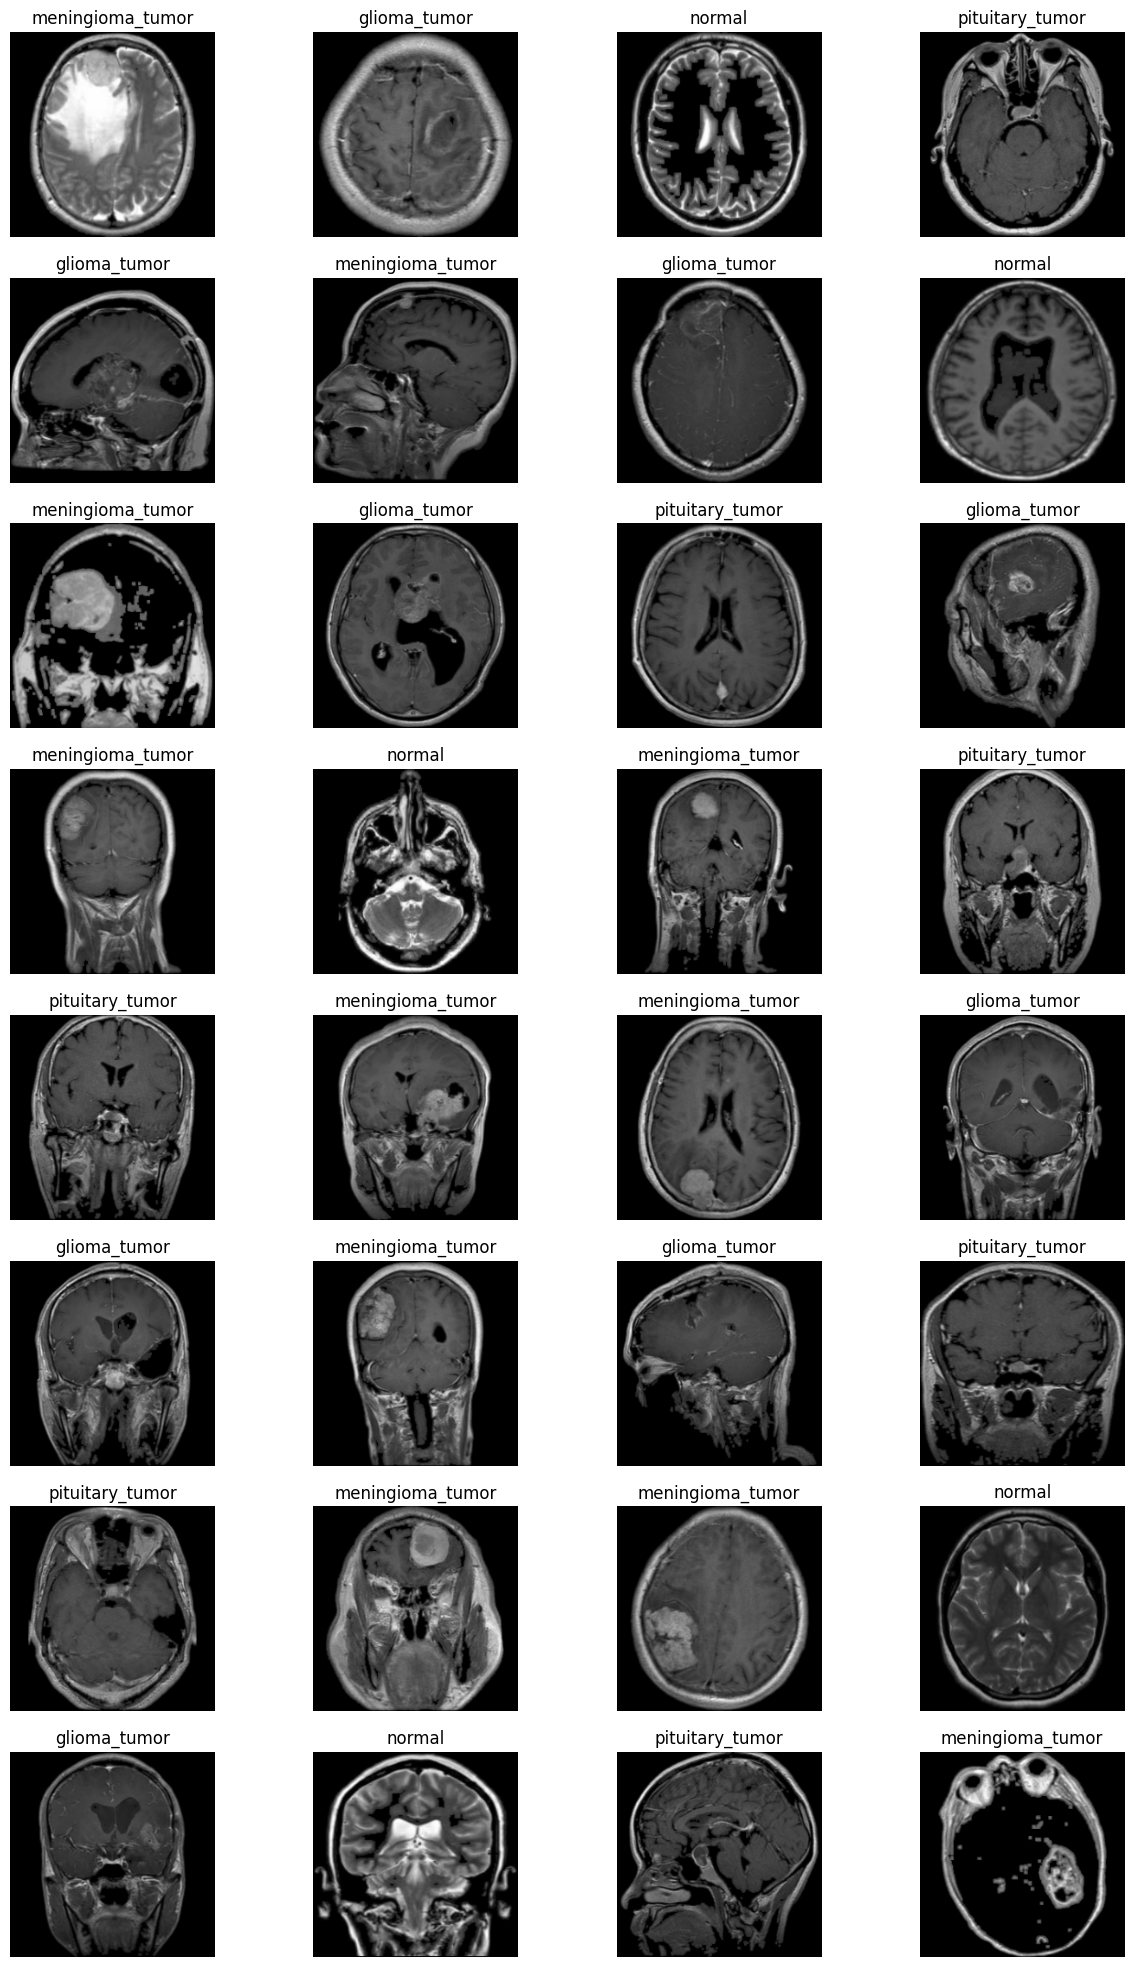

In [5]:
plt.figure(figsize=(15, 25))
for images, labels in train.take(1):
    for i in range(32):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Modeling </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [6]:
base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
model=keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dropout(.5))
model.add(keras.layers.Dense(4,activation=tf.nn.softmax))
model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4)                 100356    
                                                                 
Total params: 14,815,044
Trainable params: 100,356
Non-trainable params: 14,714,688
_________________________________________________________________


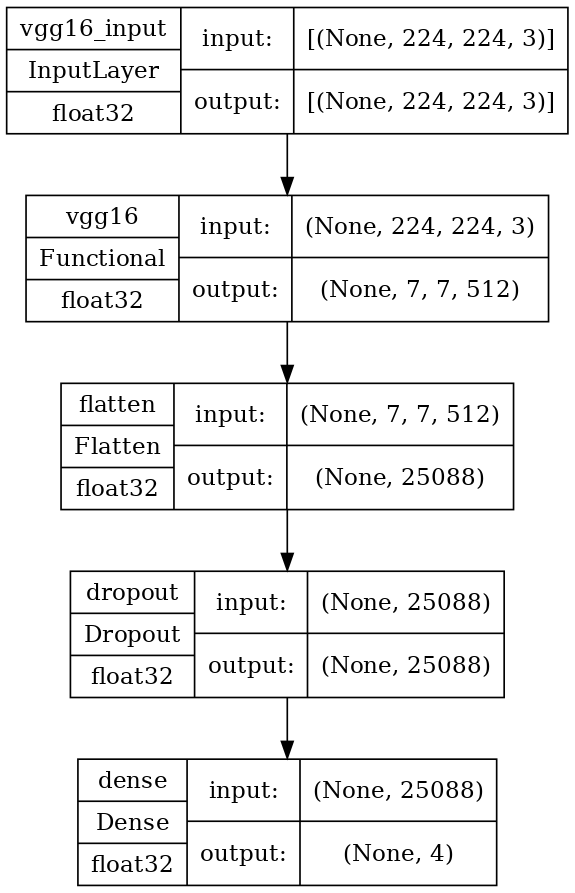

In [7]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [8]:
checkpoint_cb =ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
78/78 [==============================] - 597s 8s/step - loss: 8.5034 - accuracy: 0.6811 - val_loss: 2.2008 - val_accuracy: 0.8708
Epoch 2/20
78/78 [==============================] - 588s 8s/step - loss: 2.4851 - accuracy: 0.8708 - val_loss: 1.6410 - val_accuracy: 0.9047
Epoch 3/20
78/78 [==============================] - 586s 8s/step - loss: 2.0461 - accuracy: 0.8849 - val_loss: 1.0629 - val_accuracy: 0.9483
Epoch 4/20
78/78 [==============================] - 590s 8s/step - loss: 1.4176 - accuracy: 0.9285 - val_loss: 0.3238 - val_accuracy: 0.9677
Epoch 5/20
78/78 [==============================] - 589s 8s/step - loss: 1.1386 - accuracy: 0.9378 - val_loss: 0.4981 - val_accuracy: 0.9725
Epoch 6/20
78/78 [==============================] - 586s 8s/step - loss: 0.9205 - accuracy: 0.9471 - val_loss: 0.6790 - val_accuracy: 0.9645
Epoch 7/20
78/78 [==============================] - 588s 8s/step - loss: 0.8886 - accuracy: 0.9540 - val_loss: 0.6807 - val_accuracy: 0.9612
Epoch 8/20
78

In [9]:
score, acc = model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

20/20 [==============================] - 118s 6s/step - loss: 0.3238 - accuracy: 0.9677
Test Loss = 0.32381120324134827
Test Accuracy = 0.9676898121833801


In [10]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,8.503449,0.681066,2.200755,0.870759
1,2.485067,0.870811,1.640952,0.904685
2,2.046087,0.884941,1.062875,0.948304
3,1.417603,0.928543,0.323811,0.967690
4,1.138566,0.937828,0.498093,0.972536
5,0.920523,0.947113,0.678966,0.964459
6,0.888594,0.953977,0.680749,0.961228
7,1.065778,0.951151,0.524182,0.974152
8,0.759650,0.960032,0.325194,0.975767


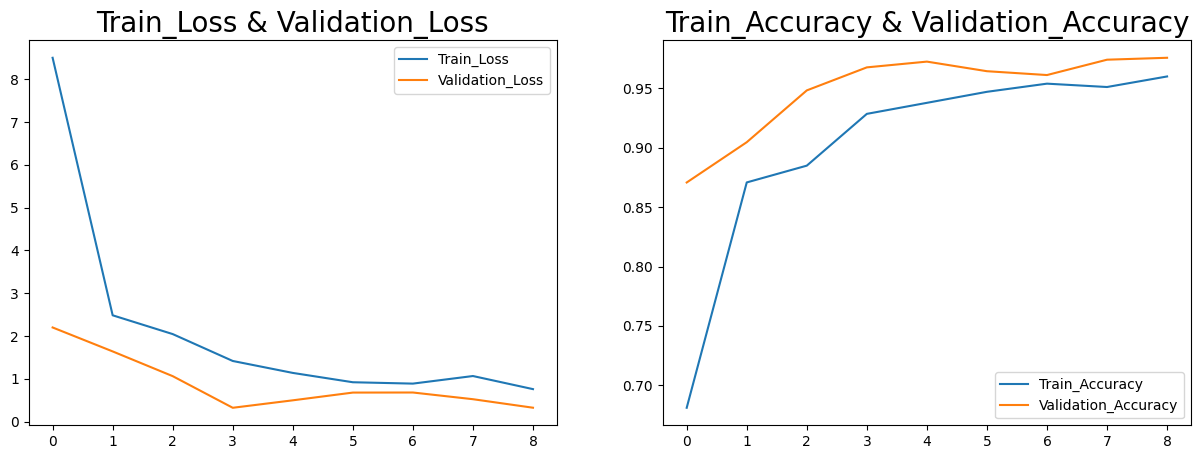

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [12]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

20/20 [==============================] - 118s 6s/step


,Actual,Prediction
0,1,1
1,3,3
2,2,2
3,0,1
4,3,3
...,...,...
614,0,0
615,3,3
616,0,0
617,0,0


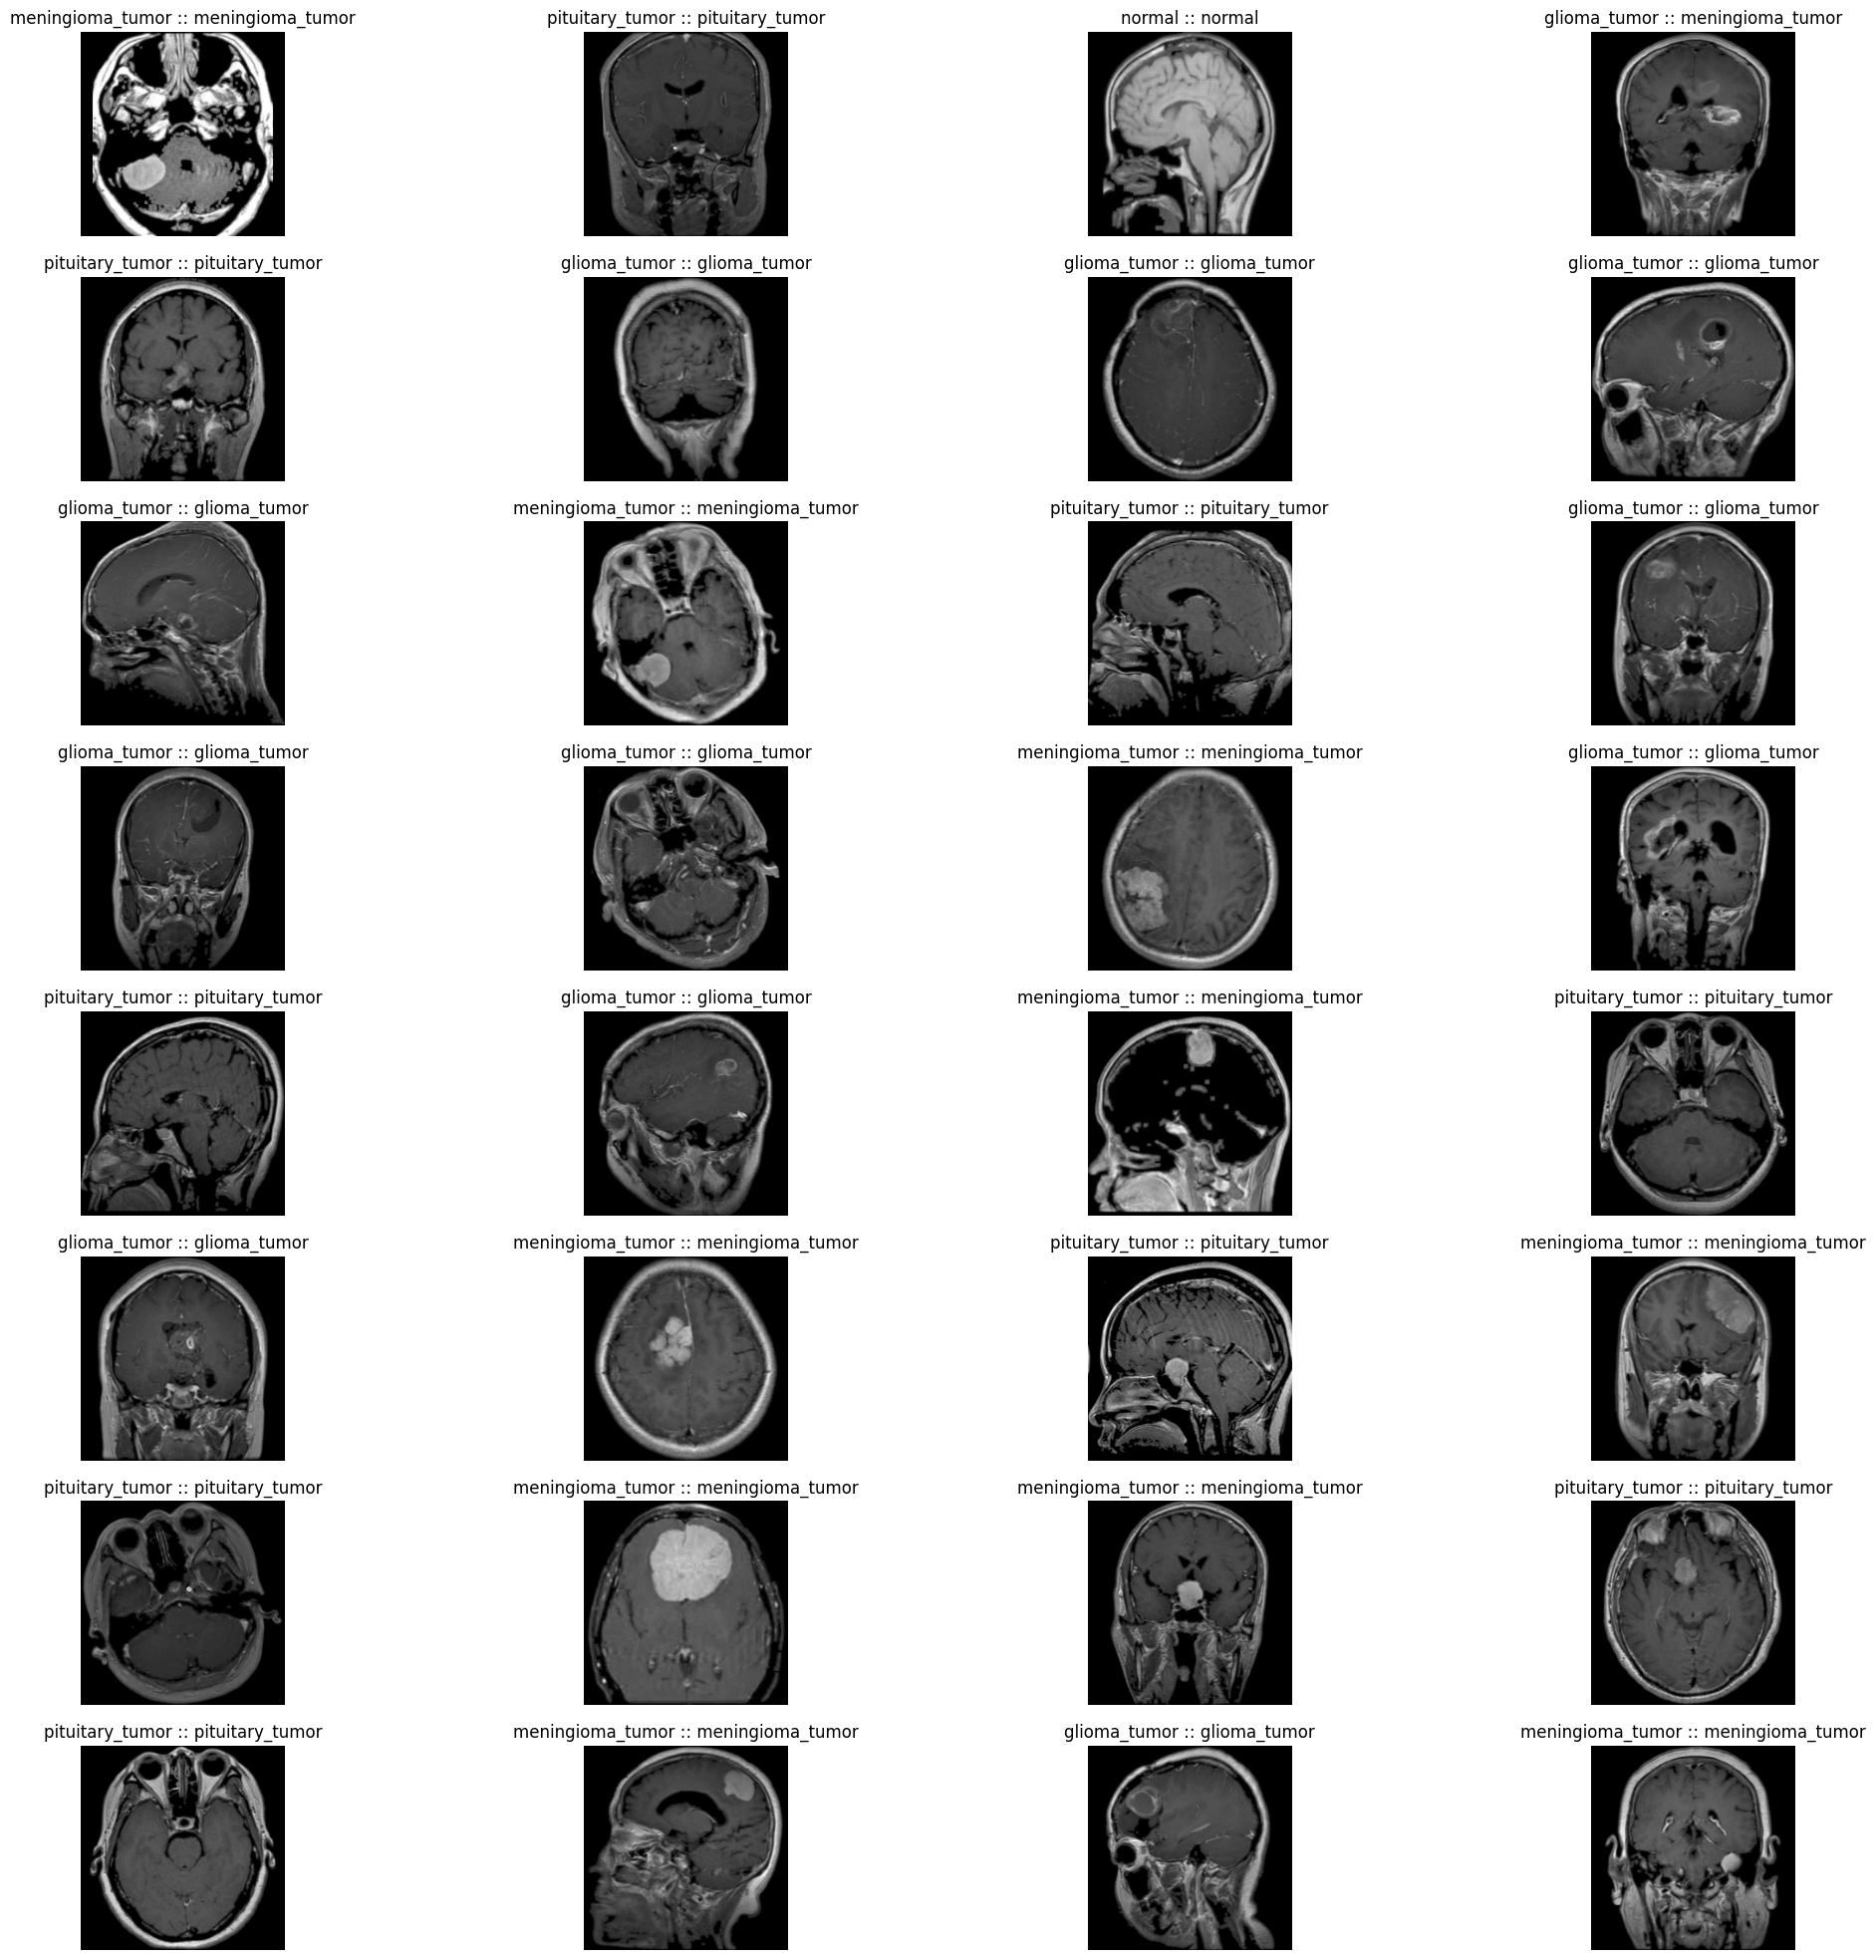

In [13]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Evaluate The Model  </p>
<a class="btn" href="#home">Tabel of Contents</a>

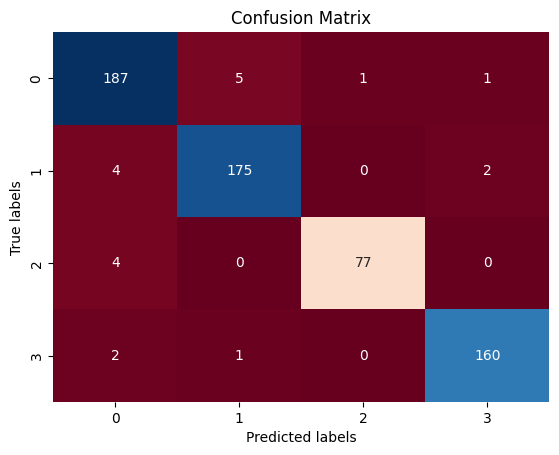

array([[187,   5,   1,   1],
       [  4, 175,   0,   2],
       [  4,   0,  77,   0],
       [  2,   1,   0, 160]])

In [14]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

In [15]:
ClassificationReport = classification_report(y_val,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.95      0.96      0.96       194
           1       0.97      0.97      0.97       181
           2       0.99      0.95      0.97        81
           3       0.98      0.98      0.98       163

    accuracy                           0.97       619
   macro avg       0.97      0.97      0.97       619
weighted avg       0.97      0.97      0.97       619

